In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\shan2\files\data.csv")

In [3]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
df.shape

(9976, 2)

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
df.rating.value_counts()

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64

(array([ 691.,    0.,  310.,    0.,    0.,  884.,    0., 2365.,    0.,
        5726.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

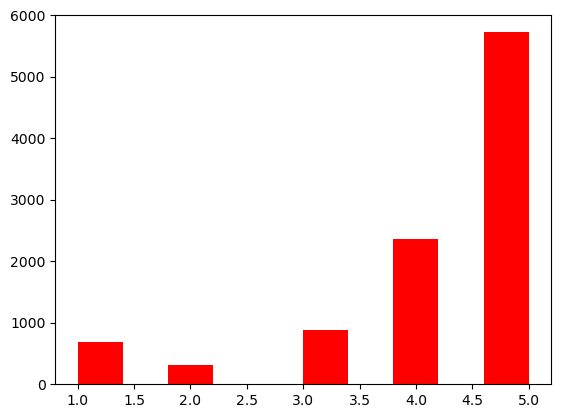

In [7]:
plt.hist(df.rating , color='red')

In [8]:
df.rating.value_counts()

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64

In [9]:
df.rating.replace({1:-1 , 2:-1 , 3:0 , 4:1 , 5:1} , inplace=True)

df.rating.value_counts()

rating
 1    8091
-1    1001
 0     884
Name: count, dtype: int64

In [10]:
# Working on reviews

In [11]:
df.review[0]

"It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE"

In [12]:
import nltk

In [13]:
from nltk.corpus import stopwords

In [14]:
l1 = stopwords.words('english')

In [15]:
import string

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

In [18]:
df['review']=df['review'].apply(remove_special)

In [19]:
def text_process(mess):
    """
    1. removes punctuations
    2. remove stopwords
    3. return the list of clean text words
    """
    nonpunc = [ char for char in mess if char  not in string.punctuation]
    nonpunc = "".join(nonpunc)
    
    return[word for word in nonpunc.split() if word not in l1]

In [118]:
df.review = df.review.str.lower()  # converting in lower case

In [21]:
df.review

0       it was nice produt  i like it s design a lot  ...
1       awesome sound    very pretty to see this nd th...
2       awesome sound quality  pros 7 8 hrs of battery...
3       i think it is such a good product not only as ...
4       awesome bass sound quality very good bettary l...
                              ...                        
9971                                        goodread more
9972    everything is amazimg but the built is very li...
9973                                        goodread more
9974         best headphone i have ever used    read more
9975                                        niceread more
Name: review, Length: 9976, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
review_count = CountVectorizer(analyzer=text_process).fit(df['review'])

In [24]:
review_count.vocabulary_

{'nice': 4340,
 'produt': 5032,
 'like': 3796,
 'design': 2072,
 'lot': 3891,
 'easy': 2347,
 'carry': 1425,
 'looked': 3864,
 'stylish': 6108,
 'read': 5267,
 'awesome': 777,
 'sound': 5916,
 'pretty': 4922,
 'see': 5643,
 'nd': 4301,
 'quality': 5143,
 'good': 2963,
 'wish': 7010,
 'take': 6263,
 'product': 4991,
 'loved': 3905,
 'pros': 5063,
 '7': 344,
 '8': 358,
 'hrs': 3338,
 'battery': 974,
 'life': 3782,
 'including': 3434,
 '45': 248,
 'mins': 4129,
 'approx': 644,
 'call': 1369,
 'time': 6459,
 'output': 4565,
 'bass': 913,
 'treble': 6549,
 'really': 5280,
 'clear': 1560,
 'without': 7016,
 'equaliser': 2444,
 'wary': 6879,
 'depends': 2054,
 'handset': 3104,
 'weightless': 6935,
 'head': 3156,
 'toomic': 6502,
 'traffic': 6536,
 '3': 208,
 '25': 182,
 '5': 267,
 '5mm': 308,
 'option': 4508,
 'important': 3400,
 'mention': 4062,
 'expecting': 2553,
 'leading': 3738,
 'brands': 1224,
 'implement': 3398,
 'consvery': 1770,
 'tight': 6447,
 'ears': 2335,
 'adjusters': 488,
 'ok

In [25]:
df_X = review_count.transform(df['review'])

In [26]:
df_X.shape

(9976, 7201)

In [27]:
type(df_X)

scipy.sparse._csr.csr_matrix

In [28]:
df.rating.value_counts()

rating
 1    8091
-1    1001
 0     884
Name: count, dtype: int64

In [117]:
# train-test split

from sklearn.model_selection import train_test_split

x_train , x_test, y_train  , y_test = train_test_split(df_X , df.rating ,test_size=.2)

In [81]:
from sklearn.metrics import confusion_matrix , precision_score , classification_report , accuracy_score , recall_score, f1_score

In [30]:
print("shape of train X --->",x_train.shape)
print("shape of train Y --->",y_train.shape)
print("shape of test X --->",x_test.shape)
print("shape of test Y --->",y_test.shape)

shape of train X ---> (7980, 7201)
shape of train Y ---> (7980,)
shape of test X ---> (1996, 7201)
shape of test Y ---> (1996,)


In [91]:
Evaluation_Results = pd.DataFrame(np.zeros((3,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Random Forest Classifier (RF)','Decision Tree Classifier (DT)','Naïve Bayes Classifier (NB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score
Random Forest Classifier (RF),0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0


In [92]:
def Classification_Summary(y_test , pred ,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = MultinomialNB()

# 1. Random Forest

In [93]:
rf.fit(x_train , y_train)

pred_rf = rf.predict(x_test)

Classification_Summary(y_test , pred_rf ,0)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 86.8%
F1 Score = 84.1%

 Confusiton Matrix:
 [[ 113    7   70]
 [  24   25  131]
 [  23    9 1594]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.59      0.65       190
           0       0.61      0.14      0.23       180
           1       0.89      0.98      0.93      1626

    accuracy                           0.87      1996
   macro avg       0.73      0.57      0.60      1996
weighted avg       0.85      0.87      0.84      1996



# 2. Decision Tree

In [94]:
dt.fit(x_train , y_train)

pred_dt = dt.predict(x_test)

Classification_Summary(y_test , pred_dt ,1)

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 82.39999999999999%
F1 Score = 81.89999999999999%

 Confusiton Matrix:
 [[ 108   22   60]
 [  30   45  105]
 [  62   72 1492]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.57      0.55       190
           0       0.32      0.25      0.28       180
           1       0.90      0.92      0.91      1626

    accuracy                           0.82      1996
   macro avg       0.59      0.58      0.58      1996
weighted avg       0.81      0.82      0.82      1996



# 3. Naive Bias

In [95]:
nb.fit(x_train , y_train)

pred_nb = nb.predict(x_test)

Classification_Summary(y_test , pred_nb ,2)

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 85.0%
F1 Score = 82.0%

 Confusiton Matrix:
 [[  93    8   89]
 [  20   18  142]
 [  17   23 1586]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.49      0.58       190
           0       0.37      0.10      0.16       180
           1       0.87      0.98      0.92      1626

    accuracy                           0.85      1996
   macro avg       0.65      0.52      0.55      1996
weighted avg       0.81      0.85      0.82      1996



                                       Algorithms Comparison                                        


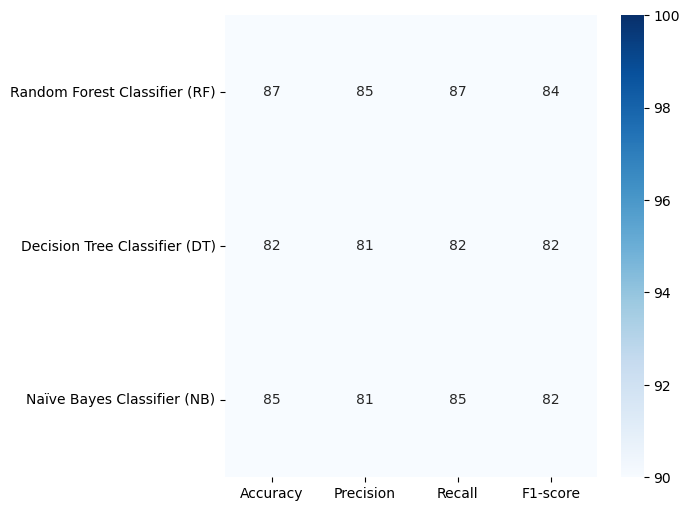

In [112]:
#Comparing all the models Scores

print('Algorithms Comparison'.center(100))
plt.figure(figsize=[6,6])

sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='Blues', fmt='.2g')
plt.show()

in this problem statement we have trained and tested ML models on ratings , so the it's important to focus on Accuracy. Random  Forest is the best accuracy amongst the three models.

# Program Execution Time

In [54]:
import timeit

start = timeit.default_timer()


text_count = CountVectorizer(analyzer= text_process).fit(df['review'])


stop = timeit.default_timer()

execution_time = stop - start

print('Program Executed in',execution_time)

Program Executed in 0.8312570000416599


timeit tells us in how much time the program get executed

# Sentiment Analyser

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

From Sentiment Intensity Analyser we will get the compound score(polarity score) of the reviews

In [69]:
polarity_score =[]

for i in range (0 , df.shape[0]):
    ans = sent.polarity_scores(df.review[i])
    polarity_score.append(ans['compound'])
    

In [74]:
df['Compound Score'] = polarity_score
df.head()

,review,rating,Polarity Score_TextBlob,Compound Score
0,it was nice produt i like it s design a lot ...,1,0.508333,0.8020
1,awesome sound very pretty to see this nd th...,1,0.575000,0.9524
2,awesome sound quality pros 7 8 hrs of battery...,1,0.308016,0.9471
3,i think it is such a good product not only as ...,1,0.300000,0.9827
4,awesome bass sound quality very good bettary l...,1,0.351250,0.8653


In [58]:
df.describe(percentiles = [.05 ,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

,rating,Polarity Score
count,9976.000000,9976.000000
mean,0.710706,0.376553
std,0.637437,0.462875
min,-1.000000,-0.950500
5%,-1.000000,-0.544800
10%,-1.000000,-0.285400
20%,1.000000,0.000000
30%,1.000000,0.000000
40%,1.000000,0.420100
50%,1.000000,0.440400


(array([  21.,   43.,   49.,   67.,   63.,   61.,   81.,   83.,   92.,
         107.,   91.,   91.,  100.,   75.,   55.,   43.,   45.,   30.,
          26., 2116.,   32.,   37.,   35.,   51.,  196.,   76.,   95.,
         123., 1051.,  394.,   95.,  488.,  759.,  273.,  217.,  426.,
         428.,  575.,  698.,  588.]),
 array([-0.9505 , -0.90194, -0.85338, -0.80482, -0.75626, -0.7077 ,
        -0.65914, -0.61058, -0.56202, -0.51346, -0.4649 , -0.41634,
        -0.36778, -0.31922, -0.27066, -0.2221 , -0.17354, -0.12498,
        -0.07642, -0.02786,  0.0207 ,  0.06926,  0.11782,  0.16638,
         0.21494,  0.2635 ,  0.31206,  0.36062,  0.40918,  0.45774,
         0.5063 ,  0.55486,  0.60342,  0.65198,  0.70054,  0.7491 ,
         0.79766,  0.84622,  0.89478,  0.94334,  0.9919 ]),
 <BarContainer object of 40 artists>)

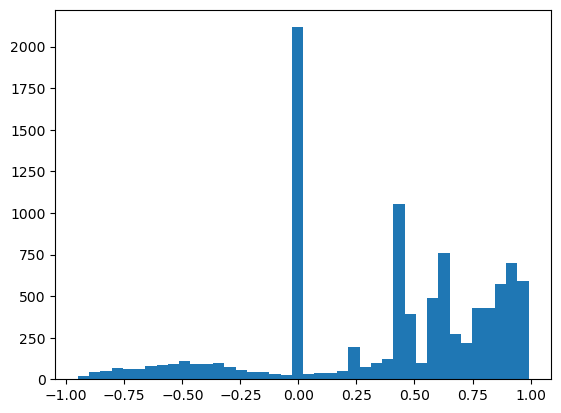

In [76]:
import matplotlib.pyplot

plt.hist(df['Compound Score'] ,bins=40)


C:\Users\shan2\AppData\Local\Temp\ipykernel_40644\385330804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Compound Score'], bins=20)


<Axes: xlabel='Compound Score', ylabel='Density'>

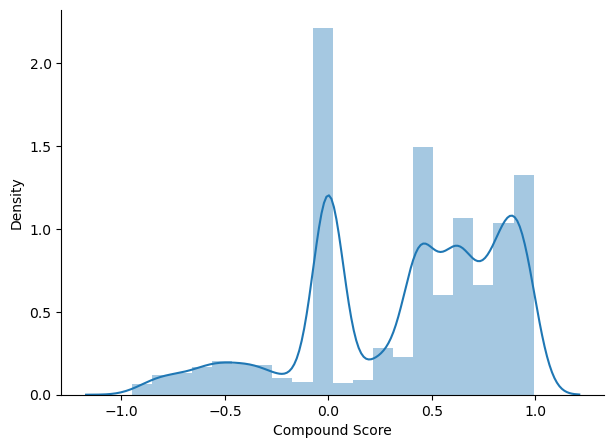

In [115]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(df['Compound Score'], bins=20)

In [77]:
df['Compound Score'].skew()

-0.6826885705248195

Result:- The Compound score for the given review is left skewed 

# TextBlob

In [62]:
from textblob import TextBlob

From TextBlob we will get the Polarity score

In [63]:
# subjectivity ---> opinion , polarity ---> -1 to 0 (-ve sentiment) and 1 to 0 (+ve sentiment)

In [64]:
textblob_polarity_score =[]

for i in range (0 , df.shape[0]):
    ans = TextBlob(df.review[i])
    textblob_polarity_score.append(ans.sentiment[0])

In [66]:
df['Polarity Score_TextBlob'] = textblob_polarity_score
df.head()

,review,rating,Polarity Score,Polarity Score_TextBlob
0,it was nice produt i like it s design a lot ...,1,0.8020,0.508333
1,awesome sound very pretty to see this nd th...,1,0.9524,0.575000
2,awesome sound quality pros 7 8 hrs of battery...,1,0.9471,0.308016
3,i think it is such a good product not only as ...,1,0.9827,0.300000
4,awesome bass sound quality very good bettary l...,1,0.8653,0.351250


In [67]:
df.describe(percentiles = [.05 ,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

,rating,Polarity Score,Polarity Score_TextBlob
count,9976.000000,9976.000000,9976.000000
mean,0.710706,0.376553,0.446972
std,0.637437,0.462875,0.195802
min,-1.000000,-0.950500,-0.627000
5%,-1.000000,-0.544800,0.075000
10%,-1.000000,-0.285400,0.177728
20%,1.000000,0.000000,0.300000
30%,1.000000,0.000000,0.375064
40%,1.000000,0.420100,0.450000
50%,1.000000,0.440400,0.500000


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        5.000e+00, 3.000e+00, 4.000e+00, 4.100e+01, 1.500e+01, 3.500e+01,
        2.200e+01, 4.100e+01, 4.200e+01, 4.500e+01, 7.300e+01, 1.070e+02,
        1.310e+02, 1.550e+02, 2.180e+02, 2.370e+02, 4.010e+02, 2.910e+02,
        4.000e+02, 6.060e+02, 4.640e+02, 4.990e+02, 5.280e+02, 2.214e+03,
        9.000e+02, 2.490e+02, 7.920e+02, 4.460e+02, 2.610e+02, 9.700e+01,
        6.040e+02, 8.000e+00, 3.100e+01, 4.000e+00]),
 array([-0.627   , -0.588825, -0.55065 , -0.512475, -0.4743  , -0.436125,
        -0.39795 , -0.359775, -0.3216  , -0.283425, -0.24525 , -0.207075,
        -0.1689  , -0.130725, -0.09255 , -0.054375, -0.0162  ,  0.021975,
         0.06015 ,  0.098325,  0.1365  ,  0.174675,  0.21285 ,  0.251025,
         0.2892  ,  0.327375,  0.36555 ,  0.403725,  0.4419  ,  0.480075,
         0.51825 ,  0.556425,  0.5946  ,  0.632775,  0.67095 ,  0.709125,
         0.7473  ,  0.785475,  0.82365 ,  0.861825,  0.9  

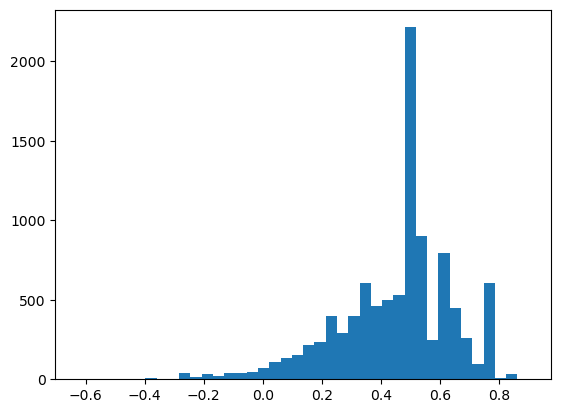

In [68]:
plt.hist(df['Polarity Score_TextBlob'] ,bins=40)


C:\Users\shan2\AppData\Local\Temp\ipykernel_40644\1804869437.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Polarity Score_TextBlob'], bins=20)


<Axes: xlabel='Polarity Score_TextBlob', ylabel='Density'>

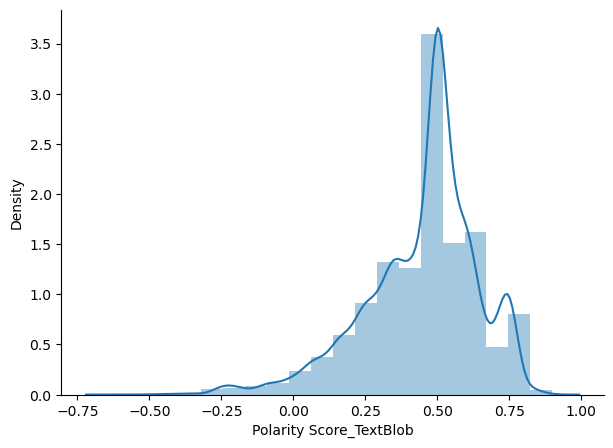

In [113]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(df['Polarity Score_TextBlob'], bins=20)

In [116]:
df['Polarity Score_TextBlob'].skew()

-0.937900946310826

Polarity score is also left skewed implies positive reviews

# Project Outcomes And Conclusions

1. Ratings has 5 unique values which is converted in 3 unique value(-1 , 0 , 1).
2. Reviews has punctuations , stopwords and special characters removed using NLTK libraries.
3. After data cleaning we have performed Count Vectorized to convert each unique words in columns making Sparse Matrix.
4. We have performed 3 ML models ands random forest gives best accuracy of 87%.
5. Polarity score and compound score of the reviews are left skewed implies that the overall review is on positive side.